In [2]:
# KNN ELBOW METHOD

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

In [4]:
%matplotlib inline


In [5]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=400 ,centers=4, cluster_std=0.6,random_state=0)

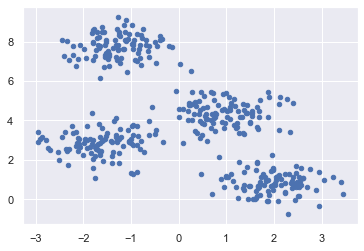

In [6]:
plt.scatter(X[:,0],X[:,1],s=20)
plt.show()

In [7]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X,y)

KMeans(n_clusters=4)

In [8]:
y_kmeans=kmeans.predict(X)


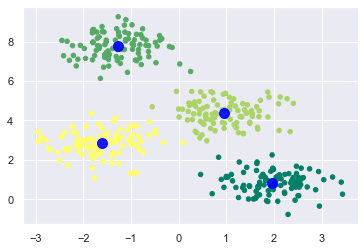

In [9]:
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=20, cmap="summer")  #error
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="blue", s=100, alpha=0.9)
plt.show()

In [20]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

In [21]:
kmeans=KMeans(n_clusters=10, random_state=0)
clusters=kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

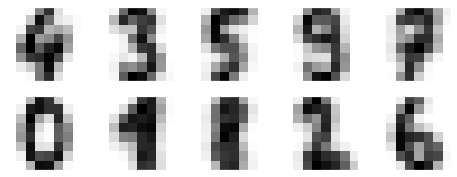

In [22]:
fig, ax= plt.subplots(2,5, figsize=(8,3))
centers=kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[],yticks=[])
    axi.imshow(center,interpolation="nearest",cmap=plt.cm.binary)

In [23]:
from scipy.stats import mode
labels=np.zeros_like(clusters)
for i in range(10):
    mask=(clusters==i)
    labels[mask]=mode(digits.target[mask])[0]

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

In [25]:
dataset=pd.read_csv("Mall_Customers.csv")

In [26]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [27]:
X=dataset.iloc[:,3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


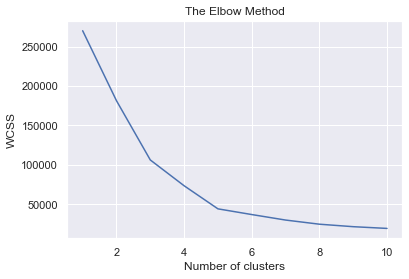

In [30]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++",random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
    

In [31]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(X)# cünkü elbow tam 5'te old icin 5i sectik

In [32]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [33]:
test=kmeans.predict([[15,39]])

print(test[0])

2


C:\Users\hsyn_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [34]:
X[y_kmeans==0].head()

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42


In [35]:
X[y_kmeans==1].head()

,Annual Income (k$),Spending Score (1-100)
124,70,29
128,71,11
130,71,9
134,73,5
136,73,7


In [36]:
X[y_kmeans==2].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
2,16,6
4,17,40
6,18,6
8,19,3


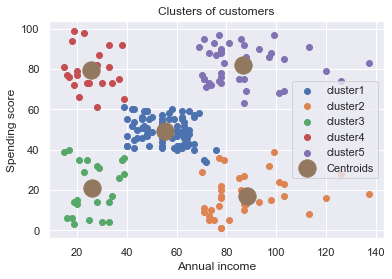

In [43]:
plt.scatter(X[y_kmeans==0]["Annual Income (k$)"],X[y_kmeans==0]["Spending Score (1-100)"], label="cluster1")
plt.scatter(X[y_kmeans==1]["Annual Income (k$)"],X[y_kmeans==1]["Spending Score (1-100)"],label="cluster2")
plt.scatter(X[y_kmeans==2]["Annual Income (k$)"],X[y_kmeans==2]["Spending Score (1-100)"],label="cluster3")
plt.scatter(X[y_kmeans==3]["Annual Income (k$)"],X[y_kmeans==3]["Spending Score (1-100)"],label="cluster4")
plt.scatter(X[y_kmeans==4]["Annual Income (k$)"],X[y_kmeans==4]["Spending Score (1-100)"],label="cluster5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300, label="Centroids")
plt.title("Clusters of customers")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

In [44]:
#Hierarchical Clustering(1-Agglomerative, 2-Divisive)

In [47]:
customer_data=pd.read_csv("Mall_Customers.csv")

In [48]:
data=customer_data.iloc[:,3:5].values

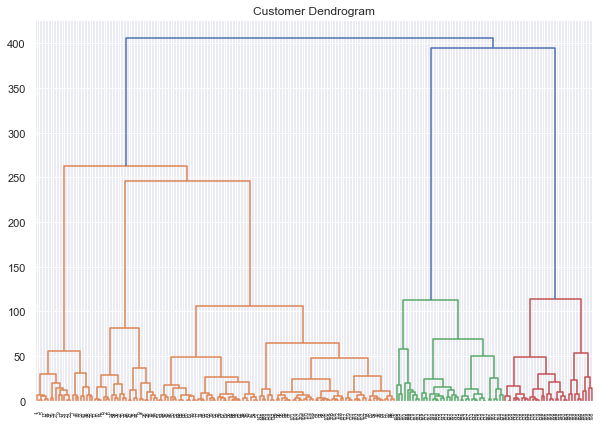

In [49]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Customer Dendrogram")
dend=shc.dendrogram(shc.linkage(data, method="ward"))


In [54]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5, affinity="euclidean",linkage="ward")
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

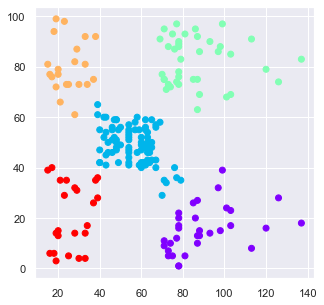

In [55]:
plt.figure(figsize=(5,5))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_,cmap="rainbow")